In [166]:
import os
import json
import statistics
from src.najdi_rok import najdi_rok
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

In [440]:
df = pd.read_parquet(os.path.join("data","cnb_vyber.parquet"))
df = df.explode('008')
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))

In [441]:
isbns = []

In [442]:
df['020_a'].sample(10)

001
bk197601622                   None
bknaus17571                   None
nos190116556                  None
bk195303293                   None
bknzdr23088                   None
bk195303775                   None
bk197505082                   None
cpk19980304098     [80-86021-38-6]
nos190125856001               None
ck8601750                     None
Name: 020_a, dtype: object

In [443]:
filtr = df[df['rok'] == 2024]

In [444]:
filtr = filtr.explode('041_h')

In [445]:
filtr = filtr[(filtr['041_h'].isnull()) | (filtr['041_h'] == 'cze')]

In [446]:
isbns += [str(x).replace('-','').strip() for x in filtr.explode('020_a')['020_a'].to_list()]

In [447]:
len(isbns)

3236

In [448]:
df = pd.read_json(os.path.join("data_raw","martinus_raw.json"))

In [449]:
isbns += df[df['M_rok_vydání'] == 2024]['M_isbn'].to_list()
isbns = list(set(isbns))
len(isbns)

4248

In [450]:
with open(os.path.join("data_raw", "rucni_sledovat.json"), "r") as rucni:
    rucni_sledovat = json.load(rucni)
isbns += rucni_sledovat
isbns = list(set(isbns))
len(isbns)

4279

In [451]:
with open(os.path.join("data_raw","sledovat_vanoce_2024.json"), "w+", encoding="utf-8") as megadump:
    megadump.write(json.dumps(isbns))

## Goodreads

In [506]:
gr1 = pd.read_csv(os.path.join("data","goodreads-hodnoceni-extra.csv"))
gr2 = pd.read_csv(os.path.join("data","goodreads-hodnoceni.csv"))
gr = pd.concat([gr1, gr2])
gr['GR_date'] = pd.to_datetime(gr['GR_date'])
gr = gr.sort_values(by='GR_date')
gr['GR_isbn'] = gr['GR_isbn'].astype(str).apply(lambda x: x.replace(".0",""))
gr = gr[gr['GR_ratings_count'] != 0]
gr = gr.drop_duplicates(subset=["GR_isbn"], keep='last')

In [508]:
gr['GR_title'].nunique()

1094

In [510]:
gr[gr['GR_title'].str.contains('Flor')]

,GR_isbn,GR_date,GR_title,GR_rating,GR_ratings_count,GR_reviews,GR_published,GR_1_stars,GR_2_stars,GR_3_stars,GR_4_stars,GR_5_stars,GR_pages,GR_format
3174,9788025744697,2024-11-29 15:36:08,"Florencie, moje (sebe)láska by Veronika Vrzalová",4.5,10.0,3.0,"June 20, 2024",0.0,1.0,0.0,2.0,7.0,360.0,paperback


In [512]:
gr = gr[gr['GR_published'].str.contains('2024',na=False)]

In [514]:
gr['GR_title'].nunique()

370

In [422]:
gr[gr['GR_title'].str.contains('Flor')]

,GR_isbn,GR_date,GR_title,GR_rating,GR_ratings_count,GR_reviews,GR_published,GR_1_stars,GR_2_stars,GR_3_stars,GR_4_stars,GR_5_stars,GR_pages,GR_format
3174,9788025744697,2024-11-29 15:36:08,"Florencie, moje (sebe)láska by Veronika Vrzalová",4.5,10.0,3.0,"June 20, 2024",0.0,1.0,0.0,2.0,7.0,360.0,paperback


In [420]:
gr[gr['GR_ratings_count'] > 20].sort_values(by='GR_ratings_count',ascending=False).head(100)

,GR_isbn,GR_date,GR_title,GR_rating,GR_ratings_count,GR_reviews,GR_published,GR_1_stars,GR_2_stars,GR_3_stars,GR_4_stars,GR_5_stars,GR_pages,GR_format
23968,9788088362166,2024-11-25 02:10:03,Šikmý kostel 3: románová kronika ztraceného mě...,4.68,639.0,52.0,"April 18, 2024",0.0,0.0,31.0,142.0,466.0,NaN,NaN
3073,9788011048396,2024-11-29 15:15:36,Zuzana Čaputová: Neztratit se sama sobě by Eri...,4.78,530.0,66.0,"June 15, 2024",0.0,1.0,16.0,83.0,430.0,248.0,hardcover
3259,9788090917422,2024-11-29 15:54:27,"Stačí mávnout křídly (Stačí mávnout křídly, #1...",4.48,445.0,88.0,"June 20, 2024",5.0,6.0,27.0,141.0,266.0,336.0,paperback
15565,9788090917408,2024-09-23 01:55:35,"Stačí mávnout křídly (Stačí mávnout křídly, #1...",4.48,396.0,84.0,"May 15, 2024",4.0,6.0,24.0,124.0,238.0,NaN,NaN
3112,9788026726463,2024-11-29 15:22:04,Odvaha by Markéta Lukášková,4.21,393.0,43.0,"May 16, 2024",4.0,14.0,51.0,152.0,172.0,280.0,hardcover
23996,9788076619340,2024-11-25 02:14:47,Můžeš říct: Miluju tě by Nofreeusernames,3.84,334.0,56.0,"May 6, 2024",8.0,9.0,88.0,152.0,77.0,NaN,NaN
3241,9788027520459,2024-11-29 15:46:43,Ignis fatuus by Petra Klabouchová,4.17,293.0,60.0,"June 4, 2024",1.0,13.0,46.0,109.0,124.0,336.0,hardcover
23612,9788025367094,2024-11-25 01:19:14,Lásky čas by Adéla Rosípalová,4.41,287.0,63.0,"April 18, 2024",3.0,3.0,23.0,101.0,157.0,NaN,NaN
3120,9788025368299,2024-11-29 15:22:58,Zlomky nekonečna by Adéla Rosípalová,4.31,252.0,40.0,"July 25, 2024",3.0,10.0,25.0,83.0,131.0,336.0,paperback
24174,9788076619593,2024-11-25 02:49:19,Národní opruzení 2 by Karolína Zoe Meixnerová,4.12,183.0,27.0,"May 1, 2024",0.0,10.0,29.0,73.0,71.0,NaN,NaN


In [418]:
gr[gr['GR_ratings_count'] > 20].sort_values(by='GR_rating',ascending=False).head(100)

,GR_isbn,GR_date,GR_title,GR_rating,GR_ratings_count,GR_reviews,GR_published,GR_1_stars,GR_2_stars,GR_3_stars,GR_4_stars,GR_5_stars,GR_pages,GR_format
24209,9788027913206,2024-11-25 02:54:45,Ester by Markéta Prášková,4.83,24.0,4.0,"January 1, 2024",0.0,0.0,0.0,4.0,20.0,NaN,NaN
3073,9788011048396,2024-11-29 15:15:36,Zuzana Čaputová: Neztratit se sama sobě by Eri...,4.78,530.0,66.0,"June 15, 2024",0.0,1.0,16.0,83.0,430.0,248.0,hardcover
23968,9788088362166,2024-11-25 02:10:03,Šikmý kostel 3: románová kronika ztraceného mě...,4.68,639.0,52.0,"April 18, 2024",0.0,0.0,31.0,142.0,466.0,NaN,NaN
3109,9788090917439,2024-11-29 15:21:40,"Pilná jako včelka (Stačí mávnout křídly, #2) b...",4.66,35.0,14.0,"October 9, 2024",0.0,0.0,0.0,12.0,23.0,352.0,paperback
24238,9788088623007,2024-11-25 03:01:46,Na neVěčné časy by Tereza Kadečková,4.64,74.0,21.0,"February 14, 2024",0.0,2.0,5.0,11.0,56.0,NaN,NaN
23928,9788088635550,2024-11-25 02:02:32,Smečka by Jiří Sivok,4.53,30.0,15.0,"April 29, 2024",0.0,0.0,2.0,10.0,18.0,NaN,NaN
15565,9788090917408,2024-09-23 01:55:35,"Stačí mávnout křídly (Stačí mávnout křídly, #1...",4.48,396.0,84.0,"May 15, 2024",4.0,6.0,24.0,124.0,238.0,NaN,NaN
3259,9788090917422,2024-11-29 15:54:27,"Stačí mávnout křídly (Stačí mávnout křídly, #1...",4.48,445.0,88.0,"June 20, 2024",5.0,6.0,27.0,141.0,266.0,336.0,paperback
3106,9788090917415,2024-11-29 15:21:26,"Hodina hromu (Století Olomouce, #2) by Lenka P...",4.46,46.0,13.0,"May 15, 2024",0.0,2.0,1.0,17.0,26.0,280.0,hardcover
24267,9788024776699,2024-11-25 03:06:06,Kdo je tu šéf? by Petra Schier,4.43,35.0,10.0,"May 31, 2024",0.0,2.0,2.0,10.0,21.0,NaN,NaN


In [516]:
gr = gr.replace({"mass market paperback":"paperback"})

In [520]:
gr[gr['GR_pages'] >= gr['GR_pages'].median()].groupby("GR_format")['GR_rating'].mean()

GR_format
hardcover    3.819783
paperback    3.996905
Name: GR_rating, dtype: float64

In [530]:
gr['GR_pages'].median()

264.0

In [532]:
gr[gr['GR_pages'] > gr['GR_pages'].median()][['GR_pages','GR_rating']].corr()

,GR_pages,GR_rating
GR_pages,1.0000,0.1454
GR_rating,0.1454,1.0000


<Axes: xlabel='GR_pages', ylabel='GR_rating'>

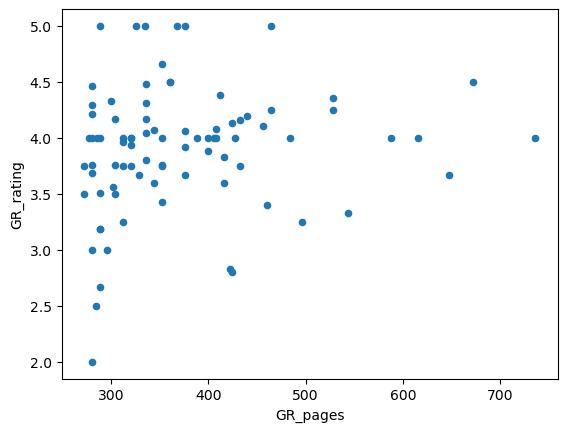

In [534]:
gr[gr['GR_pages'] > gr['GR_pages'].median()].plot.scatter(x="GR_pages",y="GR_rating")

In [268]:
gr = pd.read_csv(os.path.join("data","goodreads-hodnoceni.csv"))
gr['GR_date'] = pd.to_datetime(gr['GR_date'])
gr = gr.sort_values(by='GR_date')
gr['GR_isbn'] = gr['GR_isbn'].astype(str).apply(lambda x: x.replace(".0",""))

In [125]:
gr = gr.drop_duplicates(subset=["GR_isbn"], keep='last')

In [127]:
gr = gr[gr['GR_isbn'].isin(isbns)]

In [308]:
len(gr)

3283

In [306]:
gr['GR_ratings_count'].quantile([0.1,0.25,0.5,0.75,0.8,0.9])

0.10     0.0
0.25     1.0
0.50     4.0
0.75    15.0
0.80    19.0
0.90    49.0
Name: GR_ratings_count, dtype: float64

In [310]:
gr[gr['GR_ratings_count'] > 20].sort_values(by='GR_rating',ascending=False).head(100)

,GR_isbn,GR_date,GR_title,GR_rating,GR_ratings_count,GR_reviews,GR_published,GR_1_stars,GR_2_stars,GR_3_stars,GR_4_stars,GR_5_stars,GR_pages,GR_format,den
1158,9.788076e+12,2024-04-14 00:08:10,Květy z nahořklého dřeva by Jan Skácel,4.95,22.0,2.0,"January 1, 2000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
14,9.788076e+12,2024-04-02 10:23:45,Květy z nahořklého dřeva by Jan Skácel,4.95,22.0,2.0,"January 1, 2000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
581,9.788076e+12,2024-04-05 17:02:39,Květy z nahořklého dřeva by Jan Skácel,4.95,22.0,2.0,"January 1, 2000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2965,9.788076e+12,2024-11-12 01:52:27,Květy z nahořklého dřeva by Jan Skácel,4.95,21.0,2.0,"January 1, 2000",0.0,0.0,0.0,1.0,20.0,NaN,NaN,1
1741,9.788076e+12,2024-04-19 22:29:43,Květy z nahořklého dřeva by Jan Skácel,4.95,22.0,2.0,"January 1, 2000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3073,9.788011e+12,2024-11-29 15:15:36,Zuzana Čaputová: Neztratit se sama sobě by Eri...,4.78,530.0,66.0,"June 15, 2024",0.0,1.0,16.0,83.0,430.0,248.0,hardcover,4
2968,9.788011e+12,2024-11-12 01:55:06,Zuzana Čaputová: Neztratit se sama sobě by Eri...,4.78,509.0,64.0,"June 15, 2024",0.0,1.0,14.0,81.0,413.0,NaN,NaN,1
1446,9.788028e+12,2024-04-14 00:26:09,U severní zdi by Petra Klabouchová,4.71,324.0,43.0,"March 1, 2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
2031,9.788028e+12,2024-04-19 22:50:47,U severní zdi by Petra Klabouchová,4.71,327.0,44.0,"March 1, 2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
296,9.788028e+12,2024-04-02 10:55:28,U severní zdi by Petra Klabouchová,4.71,313.0,43.0,"March 1, 2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


## Klesá to?

In [234]:
gr = pd.read_csv(os.path.join("data","goodreads-hodnoceni.csv"))
gr['GR_date'] = pd.to_datetime(gr['GR_date'])
gr = gr.sort_values(by='GR_date')
gr['GR_isbn'] = gr['GR_isbn'].astype(str).apply(lambda x: x.replace(".0",""))
gr = gr[gr['GR_isbn'].isin(isbns)]
gr = gr[gr['GR_rating'] != 0]         
kolikrat = gr.groupby('GR_isbn').size()
kolikrat = kolikrat[kolikrat >= 30]
print(len(kolikrat))
kolikrat = kolikrat.index.to_list()
gr = gr[gr['GR_isbn'].isin(kolikrat)]
gr['tyden'] = gr.groupby('GR_isbn').cumcount() + 1

45


In [236]:
gr.groupby('tyden')['GR_rating'].mean().head(30)

tyden
1     4.028444
2     4.007111
3     3.987111
4     4.009333
5     3.988889
6     3.976000
7     3.973556
8     3.992889
9     4.008222
10    4.002667
11    4.002000
12    4.005778
13    4.012222
14    4.004889
15    3.996889
16    3.994889
17    3.980222
18    3.970222
19    3.966667
20    3.970889
21    3.976889
22    3.972000
23    3.974444
24    3.979778
25    3.981556
26    3.980222
27    3.986000
28    3.985111
29    3.984222
30    3.956444
Name: GR_rating, dtype: float64

Nejspíš ani neklesá.

## Databázeknih

In [464]:
dk = pd.read_csv(os.path.join("data","databazeknih-hodnoceni-extra.csv"))

In [466]:
dk['DK_isbn'] = dk['DK_isbn'].astype(str).apply(lambda x: x.replace(".0",""))

In [468]:
dk = dk[dk['DK_isbn'].isin(isbns)]

In [470]:
dk = dk.sort_values(by='DK_date')

In [472]:
dk = dk.drop_duplicates(subset=["DK_isbn"], keep='last')

In [474]:
dk[dk['DK_titul'].str.contains('Flora')]

,DK_isbn,DK_date,DK_titul,DK_rating,DK_ratings_count,DK_tags,DK_Právě_čtených,DK_Přečtených,DK_Čtenářské_výzvě,DK_Knihotéce,DK_Chystám_se_číst,DK_Chci_si_koupit,DK_dalších_seznamech,DK_Doporučených,DK_autorstvo,DK_vyslo
5912,9788076375031,2024-11-12 02:07:26,Flora,100.0,4.0,"['Novely', 'Literatura česká']",2.0,4.0,NaN,3.0,16.0,6.0,NaN,NaN,['Jonáš Zbořil'],NaN


In [476]:
dk

,DK_isbn,DK_date,DK_titul,DK_rating,DK_ratings_count,DK_tags,DK_Právě_čtených,DK_Přečtených,DK_Čtenářské_výzvě,DK_Knihotéce,DK_Chystám_se_číst,DK_Chci_si_koupit,DK_dalších_seznamech,DK_Doporučených,DK_autorstvo,DK_vyslo
5850,9788072279050,2024-11-12 02:06:54,Aristokratka v Československu,76.0,72.0,"['Humor', 'Romány', 'Literatura česká']",15.0,96.0,15.0,91.0,156.0,75.0,3.0,2.0,['Evžen Boček'],NaN
5912,9788076375031,2024-11-12 02:07:26,Flora,100.0,4.0,"['Novely', 'Literatura česká']",2.0,4.0,NaN,3.0,16.0,6.0,NaN,NaN,['Jonáš Zbořil'],NaN
6597,9788076425262,2024-11-12 02:13:35,Už mi lásko není 20 let,87.0,3.0,"['Literatura česká', 'Biografie a memoáry']",NaN,3.0,NaN,2.0,NaN,NaN,NaN,1.0,"['Markéta Zahradníková', 'Jiří Zmožek']",NaN
6671,9788020615190,2024-11-12 02:14:20,Klekánice,82.0,568.0,"['Detektivky, krimi', 'Literatura česká']",11.0,735.0,236.0,161.0,305.0,72.0,7.0,30.0,['Tereza Bartošová'],NaN
7328,9788027913084,2024-11-12 02:20:11,Panoptikum pana Perkinse,88.0,50.0,"['Detektivky, krimi', 'Literatura česká', 'His...",4.0,50.0,6.0,47.0,43.0,9.0,1.0,4.0,['Ilona Dobrovolná'],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9219,9788075731371,2024-11-29 16:36:37,Hawker Hurricane a Čechoslováci. 2. díl,90.0,2.0,"['Literatura naučná', 'Historie', 'Vojenství']",NaN,2.0,NaN,4.0,NaN,1.0,2.0,1.0,"['Jiří Šebek', 'Zdeněk Hurt']",2024.0
9220,9788027521456,2024-11-29 16:36:38,Zatloukání hřebů,82.0,73.0,"['Horory', 'Literatura česká']",3.0,81.0,7.0,41.0,104.0,33.0,3.0,2.0,['Vilém Koubek'],2024.0
9221,9788000074740,2024-11-29 16:36:46,Zimní knížka pro Lucinku,94.0,57.0,"['Literatura česká', 'Pro děti a mládež', 'Pří...",NaN,72.0,10.0,30.0,16.0,11.0,7.0,6.0,['Milena Lukešová'],2024.0
9222,9788076625990,2024-11-29 16:36:47,Ovál,87.0,73.0,"['Detektivky, krimi', 'Literatura česká']",2.0,86.0,13.0,38.0,55.0,10.0,2.0,3.0,['Jiří Homola'],2024.0


In [478]:
dk['DK_ratings_count'].quantile([0.1,0.25,0.5,0.75,0.8,0.9])

0.10      1.0
0.25      2.0
0.50      5.0
0.75     24.0
0.80     38.0
0.90    106.2
Name: DK_ratings_count, dtype: float64

In [482]:
dk[dk['DK_ratings_count'] >= 38].sort_values(by='DK_rating',ascending=False)

,DK_isbn,DK_date,DK_titul,DK_rating,DK_ratings_count,DK_tags,DK_Právě_čtených,DK_Přečtených,DK_Čtenářské_výzvě,DK_Knihotéce,DK_Chystám_se_číst,DK_Chci_si_koupit,DK_dalších_seznamech,DK_Doporučených,DK_autorstvo,DK_vyslo
8343,9788000073163,2024-11-29 16:24:19,Podivuhodný svět Zdeňka Buriana,98.0,41.0,"['Literatura česká', 'Literatura naučná', 'Umě...",2.0,39.0,4.0,58.0,26.0,28.0,6.0,7.0,"['Ondřej Müller', 'Rostislav Walica', 'Ondřej ...",2024.0
7904,9788026451273,2024-11-29 16:18:29,Skutečné zločiny na Ostravsku 2,98.0,40.0,"['Detektivky, krimi', 'Literatura faktu', 'His...",5.0,43.0,5.0,53.0,32.0,12.0,1.0,3.0,['Ivana Žáková'],2024.0
8588,9788027913206,2024-11-29 16:27:28,Ester,96.0,217.0,"['Pro ženy', 'Literatura česká', 'Historické r...",5.0,274.0,56.0,82.0,157.0,41.0,3.0,18.0,['Markéta Prášková'],2024.0
8854,9788024295657,2024-11-29 16:31:13,O zvědavém štěňátku,96.0,196.0,"['Literatura česká', 'Pro děti a mládež', 'Poh...",NaN,261.0,23.0,82.0,5.0,7.0,5.0,16.0,['Iva Hercíková'],2024.0
8136,9788024296838,2024-11-29 16:21:23,Morávkova zpověď aneb věřím v Boha a ve své pi...,95.0,49.0,"['Literatura česká', 'Biografie a memoáry', 'H...",3.0,54.0,6.0,38.0,78.0,35.0,2.0,9.0,['Pavel Černý'],2024.0
8039,9788087595329,2024-11-29 16:20:17,O andělovi,95.0,57.0,"['Literatura česká', 'Poezie', 'Filozofie']",2.0,61.0,15.0,12.0,10.0,8.0,NaN,9.0,['Pavel Čech'],2024.0
8215,9788026452935,2024-11-29 16:22:27,Upečeno s láskou: Kváskový chléb a pečivo,95.0,44.0,"['Literatura česká', 'Literatura naučná', 'Kuc...",3.0,47.0,7.0,75.0,14.0,21.0,1.0,9.0,"['Iva Trhoňová', 'Ludmila Gottwaldová']",2024.0
7896,9788011048396,2024-11-29 16:18:23,Zuzana Čaputová: Neztratit se sama sobě,95.0,78.0,"['Literatura faktu', 'Biografie a memoáry', 'P...",16.0,103.0,25.0,57.0,97.0,24.0,1.0,12.0,"['Erik Tabery', 'Zuzana Čaputová']",2024.0
9086,9788026726999,2024-11-29 16:34:43,Když přišli psi,94.0,386.0,"['Romány', 'Literatura česká', 'Historické rom...",28.0,499.0,57.0,158.0,579.0,151.0,8.0,48.0,['Scarlett Wilková'],2024.0
8662,9788011050702,2024-11-29 16:28:30,Neklidná růže,94.0,46.0,"['Pro ženy', 'Literatura česká', 'Erotika']",2.0,50.0,1.0,32.0,52.0,4.0,3.0,5.0,['Monika J. Čapková'],2024.0
